<a href="https://colab.research.google.com/github/BettyBett/CODSOFT/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Car Sales Price Prediction

#### Data Understanding

In [2]:
# Import libraries necessary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,accuracy_score
from math import sqrt

In [3]:
# Preview the data
df = pd.read_csv('car_purchasing.csv', encoding = 'latin-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [34]:
# Preview the last rows
df.tail(10)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
490,Jonah,augue@risusNuncac.co.uk,Myanmar,1,45.752698,63722.00164,10711.444720,316128.4002,41352.47071
491,Merrill,dolor.sit@turpisIn.com,Egypt,1,50.197205,78518.21527,10072.482980,294506.0844,52785.16947
492,Nolan,Donec.at@neccursus.co.uk,Latvia,0,55.087720,72424.80112,9831.184792,523680.7699,60117.67886
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,0,42.900187,77665.17195,13308.879320,349588.5608,47760.66427
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,0,51.767418,77345.61633,6736.751680,665099.1390,64188.26862
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
df.shape

(500, 9)

In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


#### Data cleaning

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# check for null values
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [9]:
df['country'].value_counts()

Israel                 6
Mauritania             6
Bolivia                6
Greenland              5
Saint Barthélemy       5
                      ..
El Salvador            1
Denmark                1
Oman                   1
Trinidad and Tobago    1
marlal                 1
Name: country, Length: 211, dtype: int64

In [10]:
# drop some columns
data = df.drop(['customer name', 'customer e-mail','country'], axis =1)
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
data.age.max()

70.0

In [12]:
data.rename(columns ={'car purchase amount' : 'car price'}, inplace=True )

In [13]:
data.dtypes

gender                int64
age                 float64
annual Salary       float64
credit card debt    float64
net worth           float64
car price           float64
dtype: object

In [14]:
data = data.astype(int)
data.dtypes

gender              int64
age                 int64
annual Salary       int64
credit card debt    int64
net worth           int64
car price           int64
dtype: object

#### Data Visualization

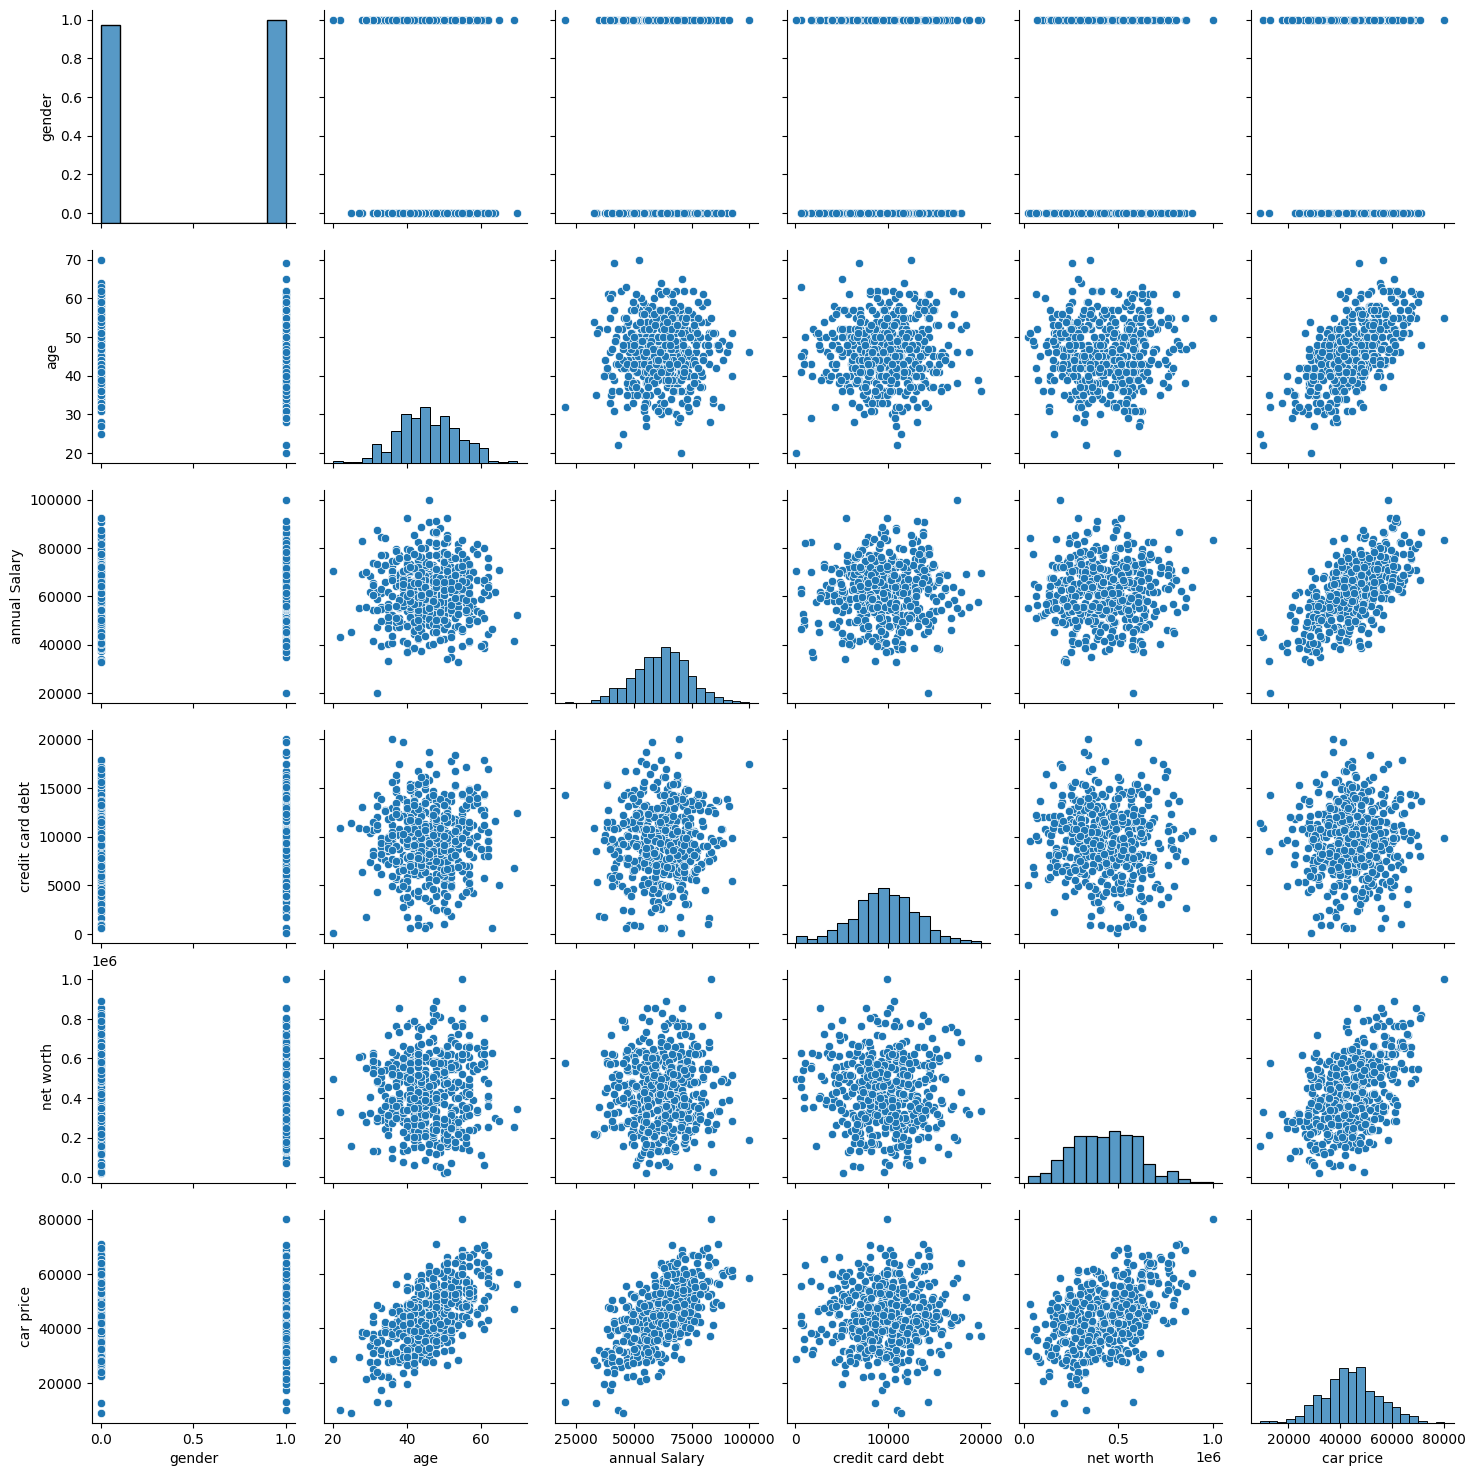

In [15]:
sns.pairplot(data);

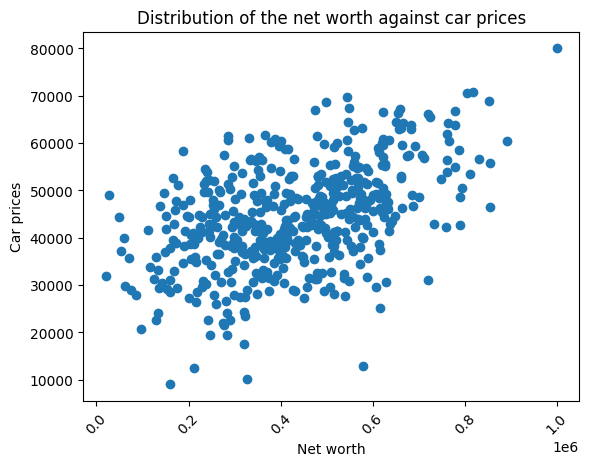

In [16]:
plt.scatter(x = data['net worth'], y = data['car price'])
plt.xlabel('Net worth')
plt.ylabel('Car prices')
plt.title('Distribution of the net worth against car prices')
plt.xticks(rotation=45);

Skewness: -0.030785
Kurtosis: 0.227239


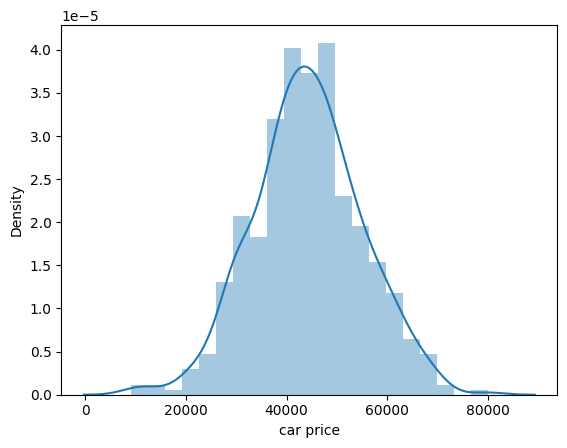

In [17]:
sns.distplot(data['car price'])

print("Skewness: %f" % data['car price'].skew())
print("Kurtosis: %f" % data['car price'].kurt())

<Axes: xlabel='age', ylabel='Count'>

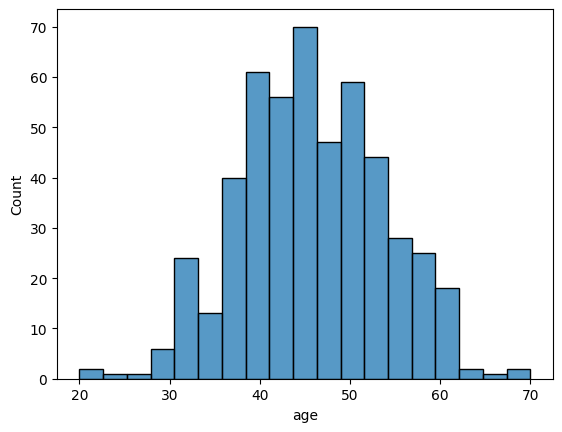

In [18]:
sns.histplot(data['age'])

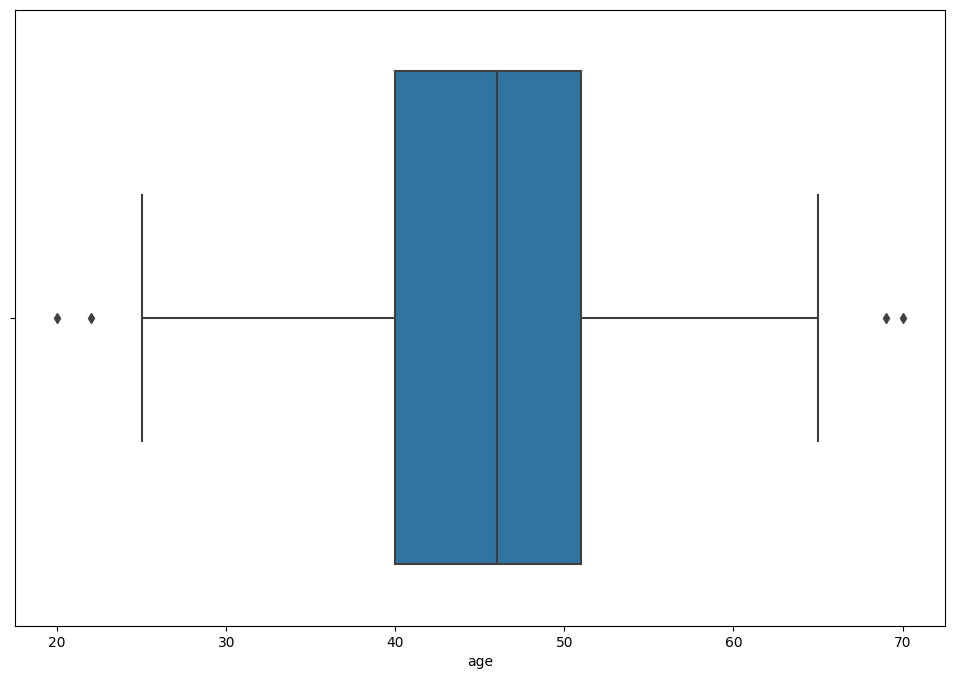

In [19]:
# check for outlierss
plt.figure(figsize=(12,8))

sns.boxplot(x = 'age', data = data)

# Display the plot
plt.show()

In [20]:
# Find the correlation of these features relative to car price
corr = data.corr()
corr.sort_values(['car price'], ascending = False, inplace = True)
corr['car price']

car price           1.000000
age                 0.631192
annual Salary       0.617865
net worth           0.488577
credit card debt    0.028876
gender             -0.066407
Name: car price, dtype: float64

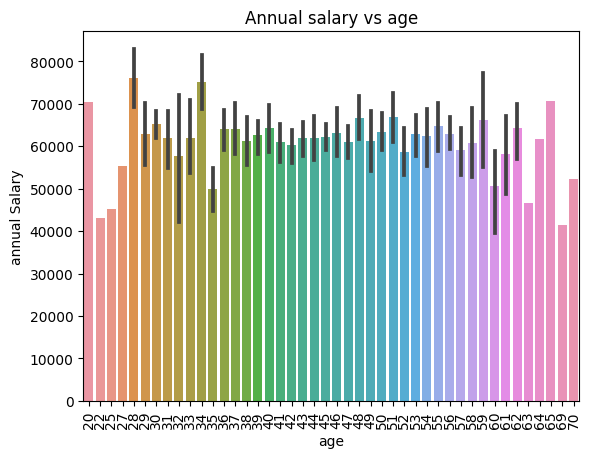

In [21]:
sns.barplot(x = 'age', y = 'annual Salary', data = data)
plt.title('Annual salary vs age')
plt.xticks(rotation = 90);

####Normalize the data

In [22]:
min_val = 0
max_val = 1

# Perform min-max scaling
scaled_data = ((data - data.min()) / (data.max() - data.min()) * (max_val - min_val) + min_val).round(4)
scaled_data

,gender,age,annual Salary,credit card debt,net worth,car price
0,0.0,0.42,0.5352,0.5783,0.2234,0.3707
1,0.0,0.40,0.5831,0.4760,0.5214,0.5087
2,1.0,0.46,0.4225,0.5558,0.6311,0.4778
3,1.0,0.76,0.7421,0.7199,0.5394,0.8228
4,1.0,0.74,0.4966,0.2642,0.5513,0.6608
...,...,...,...,...,...,...
495,0.0,0.42,0.6493,0.3465,0.5323,0.5620
496,1.0,0.34,0.4505,0.6131,0.3474,0.3168
497,1.0,0.66,0.6111,0.5282,0.7597,0.7767
498,1.0,0.78,0.3726,0.6991,0.3243,0.5133


#### Modeling

In [23]:
X = data.drop('car price', axis = 1)
y = data['car price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((400, 5), (100, 5))

### Random Forest

In [26]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R Squared: {r2:.2f}')

Mean Squared Error: 5504579.63
Mean Absolute Error: 1647.24
R Squared: 0.95


#### Polynomial Regression

In [33]:
poly = PolynomialFeatures(degree = 6, include_bias = False)
X_poly = poly.fit_transform(X_train)

lr.fit(X_poly, y_train)

X_poly_test = poly.fit_transform(X_test)
poly_pred = lr.predict(X_poly_test)
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)


print(f'Mean Squared Error: {poly_mse:.2f}')
print(f'R Squared: {poly_r2:.2f}')

Mean Squared Error: 42218335.84
R Squared: 0.61


### Lasso

In [29]:
lasso = Lasso(alpha = 1000)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

lasso_mse = metrics.mean_squared_error(y_test, lasso_pred)
lasso_r2 = metrics.r2_score(y_test, lasso_pred)


print(f'Mean Squared Error: {lasso_mse:.2f}')
print(f'R Squared: {lasso_r2:.2f}')


Mean Squared Error: 2781287.76
R Squared: 0.97
